# Formelsammlung
## Kenngroessen der Maschine
* Maximalenergie $E_{max}$
* Minimalenergie/Injektionsenergie $E_{min}$
* Luminositaet $\mathscr{L}$

## Parameter der Maschine
* max/min Flussdichte der Ablenkdipole $B_z$
* Umfang des Rings (hier bereits gegeben)
* Frequenz der Beschleunigungskavitaet $f_{rf}$
* anzahl der teilchen in einem Bunch $N_b$
* maximal zulaessige emmittanz $\epsilon$
* FODO-Zellenauslegung magnetische Struktur am interaktionspunkt.

# Anforderungen an die Maschine
* $10^6$ ttbar events in 75% eines Jahres
* Strahlenergie von maximal 50 MJ
* Stahlstrom von Maximal 1 A
* Tunnellaenge von 6km

Der Markannteste Parameter der Maschine ist wohl die Teilchenenergie. Die Teilchenenergie bestimmt den Wirkungsquerschnitt des Prozesses, und damit auch die notwendige Luminositaet der Maschine um die geforderte Eventrate zu erreichen. In unserem Fall gilt, je hoeher die Energie, desto groesser der Wirkungsquerschnitt des ttbar prozess. Mit steigender Energie steigt auch die abgestrahlte Synchrotronstrahlungsleistung, welche fuer einen wirtschaftlichen Betrieb der Maschine nicht zu gross werden sollte. Gleichzeitig sollte die Stahlungsleistung moeglichst klein gehalten werden, da bei steigender Strahlungsleistung die Kuehlung des Strahlrohrs zu einem Problem werden kann, gleichzeitig werden von der Synchrotronstrahlung elektronen aus der Strahlrohrwand ausgeschlagen die den Strahl destabilisieren koennen.

Hier ist also die erste Abschaetzung notwendig, auf der einen seite sollte die Strahlenergie moeglichst klein gehalten werden um den Beschleuniger zuverlaessig und moeglichst guenstig betreiben zu koennen, jedoch muss gleichzeitig die Strahlenergie fuer einen grossen wirkungsquerschnitt moeglichst gross sein um die Anforderungen an die Luminositaet zu senken.

Die Energie des Strahls ist durch die Flussdichte der Magneten limitiert. Der LHC setzt aktuell Magneten mit einer Feldstaerke von 8 Tesla ein, somit kann als erste naeherung Die Energie bei 6km umfang und 8T Dipolmagnetstaerke berechnet werden. Von da koennen dann die weiteren relevanten Parameter berechnet werden.

Die Teilchenenergie kann mit folgender Formel berechnen:

$\frac{1}{\rho [m]} = 0.2998 \frac{B [T]}{p [GeV/c]}$

wobei $B$ das Magnetfeld, $p$ der Teilchenimpuls und $\rho$ der Radius des Rings ist. Umgestellt nach der Teilchenenergie ergibt dies:

$p [GeV/c] = 0.2998 B [T] \rho [m] $

Mithilfe der Energie der Teilchen kann nun die Schwerpunktsenergie und daraus der Wirkungsquerschnitt berechnet werden. Bei der Berechnung der Strahlenergie muss darauf geachtet werden, dass nicht der ganze Ring mit Dipolen ausgekleidet sein kann, da sowohl Fokusierung, kuehlung und natuerlich auch das Experiment untergebracht werden koennen. Dementsprechend ist der 'effektive Umfang um den entsprechenden, nicht mit magneten ausgekleideten Teil der Strahlfuehrung vermindert. Es soll ein Fuellfaktor von ca $0.6$ angenommen werden. 

<img src="./figures/plot.jpg" width="700">

In [1]:
fillfaktor = 0.6
approximate_bending_radius = 6000 * fillfaktor / (2 * 3.14159265)
magnetic_flux = 8 # tesla
def particle_energy(magnetic_flux):
     return 0.2998 * magnetic_flux * approximate_bending_radius # particle energy in TeV
particle_energy(magnetic_flux)

1374.1819774119983

Die Teilchenenergie ist allerdings nicht die Energie im Wechselwirkungspunkt, da hier zwei strahlen gleicher Energie aufeinander treffen.

In [2]:
def rest_frame_energy(magnetic_flux):
    return 2 * particle_energy(magnetic_flux)

In [3]:
rest_frame_energy(8)

2748.3639548239967

In [4]:
rest_frame_energy(9)

3091.909449176996

In [5]:
rest_frame_energy(10)

3435.454943529996

In [6]:
rest_frame_energy(11)

3779.0004378829954

In [7]:
rest_frame_energy(12)

4122.545932235995

Die Sollluminositaet kann nun mithilfe der benoetigten Eventrate und dem zu erwartenden Wirkungsquerschnitt berechnet werden.
Die Formel fuer die Luminositaet ist:

$\mathscr{L}_{soll} = \frac{1}{\sigma} \cdot \frac{\mathrm{d}N}{\mathrm{d}t}$

Die rate wird pro sekunde angegeben und betraegt:

In [8]:
events_per_sec_min = 10**6 / (356*24*60*60*.75)
events_per_sec_min

0.043348592037730616

Bei den betrachteten magnetischen Flussdichten sind die Wirkungsquerschnitte zwischen 8 pb und 35 pb fuer eine Proton-Proton maschine und 17pb und 50pb fuer eine Proton-Antiproton maschine.


|$B_D$|$\sqrt{s}$| $\sigma_{pp}$ |$\sigma_{p\bar{p}}$|
|---|---|:-:|:-:|
|8 T | 2748 GeV | 8 pb | 17 pb|
|9 T | 3091 GeV | 11 pb | 21 pb |
|10 T | 3435 GeV | 20 pb | 28 pb |
|11 T | 3779 GeV | 28 pb | 35 pb |
|12 T | 4112 GeV | 35 pb | 50 pb |

wobei $B_D$ die Flussdichte der ablenkungs-Dipole ist

Im folgenden werden noch alle zahlen in SI einheiten umgerechnet.

In [9]:
pp_crossections = [8, 11, 20, 28, 35]
ppbar_crossections = [17, 21, 28, 35, 50]
def pb_to_square_meters(pb):
    return 10**-40 * pb

def square_cm_to_square_meters(cm2):
    return 10**-4 * cm2

fluxes = [8, 9, 10, 11, 12]
flux_dependent_crosssections = [(flux, rest_frame_energy(flux), pb_to_square_meters(pp), pb_to_square_meters(ppbar)) for flux, pp, ppbar in zip(fluxes, pp_crossections, ppbar_crossections)]
flux_dependent_crosssections

[(8, 2748.3639548239967, 8e-40, 1.7e-39),
 (9, 3091.909449176996, 1.0999999999999998e-39, 2.1e-39),
 (10, 3435.454943529996, 2e-39, 2.7999999999999998e-39),
 (11, 3779.0004378829954, 2.7999999999999998e-39, 3.5e-39),
 (12, 4122.545932235995, 3.5e-39, 5e-39)]

Bei den unterschiedlichen Energien kann nun die minimal notwendige (mittlere) Luminositaet berechnet werden.

In [10]:
def calc_needed_lumi(crosssection):
    return 1 / crosssection * events_per_sec_min

flux_dependent_min_lumi = [(c[0], calc_needed_lumi(c[2]), calc_needed_lumi(c[3])) for c in flux_dependent_crosssections]
flux_dependent_min_lumi

[(8, 5.4185740047163275e+37, 2.549917178690036e+37),
 (9, 3.9407810943391476e+37, 2.0642186684633627e+37),
 (10, 2.167429601886531e+37, 1.5481640013475223e+37),
 (11, 1.5481640013475223e+37, 1.2385312010780177e+37),
 (12, 1.2385312010780177e+37, 8.669718407546123e+36)]

Da die Luminositaet von de
$N^2 \sigma_p /A$ mit $A$ der Strahlquerschnittsfläche

Luminosität:

$ \mathscr{L}=\frac{I_+ I_-}{4\pi e^2 f_{\text{fev}} n_b \sigma_x \sigma_y} = \frac{N_1 N_2 f_{\text{rev}}}{n_b A}=\dot{N_p}\frac{1}{\sigma_p}$

mit:
- $n_b$ der Anzahl der Bunche im Strahl
- $N_1, N_2$ der Teilchen in Bunch 1 und 2
- $\sigma_{x,y}$ der Stahlgröße am Wechselwirkungspunkt
- $N$ der Gesamtteilchenzahl in einem Strahl
- $I=e N f_{\text{rev}}$ dem Strahlstrom
- $A=4\pi\sigma_x\sigma_y$ bei Gaußverteilten Paketen

Ereignisrate:

$\dot{N_p}=(N^2 f_{\text{rev}}/A) \sigma_p=\mathscr{L} \sigma_p$

Rahmenbedingungen:
- mindestens $10^6$ Events pro Jahr bei 75\% Verfügbarkeit der Maschine $\rightarrow$ 0.042279722645019446 Paare pro Sekunde
- Pro Kollision nicht mehr als 5 $t\bar{t}$-Paare 
- Im Strahl gespeicherte Energie $\leq 50\,$MJ $\rightarrow$ Energie im Strahl $=N\cdot \frac{\sqrt{s}}{2}$ oder?!
- Strahlstrom $I\leq1\,\text{A}$
- Umfang 6km

In [11]:
import numpy as np
from scipy import constants 

In [12]:
c=constants.c
e=constants.e
e

1.602176634e-19

In [13]:
# Länge des Beschleunigers in km
l=6
# Radius in m
r=l*1.E3/(2*np.pi)
# Magnetstärke in Tesla
B=8
# Dipolfüllfaktor
a=0.67
# Ablenkradius im Dipol
r_bending=r*a

In [14]:
# Energy in TeV
energy=r_bending*c*B*1.E-12
E_cm=2*energy

In [15]:
E_cm

3.0689292064212017

Lese Wirkungsquerschnitt aus Diagramm ab: $\sigma\sim 20\,$pb



In [16]:
sigma_ttbar=10

In [17]:
# Events pro Sekunde
events_per_s=1e6/(0.75*365*24*60*60)
events_per_bunchcrossing=5

5 Paare pro Bunchcrossing,  0.042279722645019446 Paare pro Sekunde

Luminosität $\mathscr{L}=\dot{N} \cdot \frac{1}{\sigma}$

In [18]:
# Luminosität in m^-2*s^-1
L=events_per_s/(sigma_ttbar*1E-40) 

In [19]:
L*1.e-4 # in cm^-2*s^-1

4.2279722645019453e+33

In [20]:
L

4.227972264501945e+37

Untere Grenze der instantanen Luminosität

<img src="./figures/luminosity_comparison.jpg" width="300">

In [21]:
# Umlauffrequenz
f_rev=c/(l*1e3)

In [22]:
f_rev/1.e3

49.965409666666666

Umlauffrequenz $f_{rev}\approx 50\,\text{kHz}$

Maximaler Strahlstrom $I=e N f_{\text{rev}}=1\,\text{A}$

In [23]:
# Strahlstrom in A
current=1

In [24]:
# Teilchenzahl pro Strahl
N=current/(e*f_rev)

In [25]:
N/1.E12

124.9165996256136

$\dot{N_p}=(N^2 f_{\text{rev}}/A) \sigma_p=\mathscr{L} \sigma_p$

In [26]:
# Querschnittsfläche der Bunches im Kollisionspunkt
A=(N**2)*f_rev/L

In [27]:
A # in m^2

1.844070966737749e-05

In [28]:
stored_energy=energy*1.E12*e*N

In [29]:
stored_energy/1.E6 # in MJ

30.710537819012128

# Fragen
- sinnvoller Strahlquerschnitt im Interactionspunkt
- Events, Kollisionen?

$\rightarrow$ RF-Frequenz $400\,\text{MHz}$

In [30]:
f_rf=400.E6

In [31]:
f_rf

400000000.0

Bunchanzahl $n_b$

In [32]:
n_b=f_rf/f_rev

In [33]:
n_b

8005.538284755649

In [34]:
# Teilchen pro Bunch in 10^11
N/n_b/1.E11

0.15603772686151907

# Magnetstruktur

- maximale Transportlänge 14 Meter

# Antiproton-Erzeugung
Rate der Erzeugung, wie lange dauert es, den Ring zu füllen

In [35]:
rho1=10/2.998*1*energy*1.e3/B

In [36]:
rho1

639.786775854987

In [37]:
# arc length lm in meter
lm=l*1e3*0.67
# bending radius rho in meter
rho=lm/(2*np.pi)

In [38]:
rho

639.8028712294193

In [39]:
# beam rigidity in Tesla meter
B*rho

5118.422969835355

# Synchrotronstrahlung und Energieverlust
- abgestrahlte Leistung --> Kühlung
- Energieverlust muss wieder zugeführt werden über RF-Cavity
- Synchrotronverluste im Quad


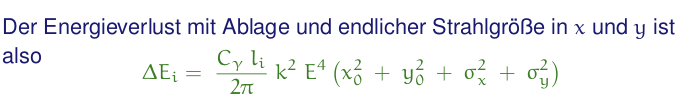

# Quadrupol
- Gradient: $g=2\mu_0 n I /R^2$ mit $n$ der Anzahl an Windungen und $R$ dem Abstand der Pole vom Zentrum
- Stärke: $k[m^{-2}]=0.2998\frac{g [T/m]}{p [GeV/c]}$
- Brennweite: $f=-\frac{1}{k\cdot l}$ mit $l$ der Länge des Quad

### Anmerkung Fr. Müller
Keine Dispersion im Experiment -> Achromat, Dispersionssupressor

# FODO

<img src="./figures/beta_function.jpeg" width="700">

<img src="./figures/fodo.jpeg" width="700">